In [1]:
from plotting_utils import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## AL strategies

In [13]:
al_sheet_names = ["condition_first_cluster", "lowest_diff_cluster", "random_cluster"]
# random_sheet_names = ["condition_first_random", "lowest_diff_random", "random_random"]
full_data_baseline_sheets = ["full_rpc_cluster", "full_rfr_cluster"]

al_result_dfs = [pd.read_excel("performance_excels/AL/amine_6_2_2_4.xlsx", sheet_name=x) for x in al_sheet_names]
# random_result_dfs = [pd.read_excel("performance_excels/AL/amine_6_2_2_3.xlsx", sheet_name=x) for x in random_sheet_names]
full_data_dfs = [pd.read_excel("performance_excels/AL/amine_6_2_2_4.xlsx", sheet_name=x) for x in full_data_baseline_sheets]

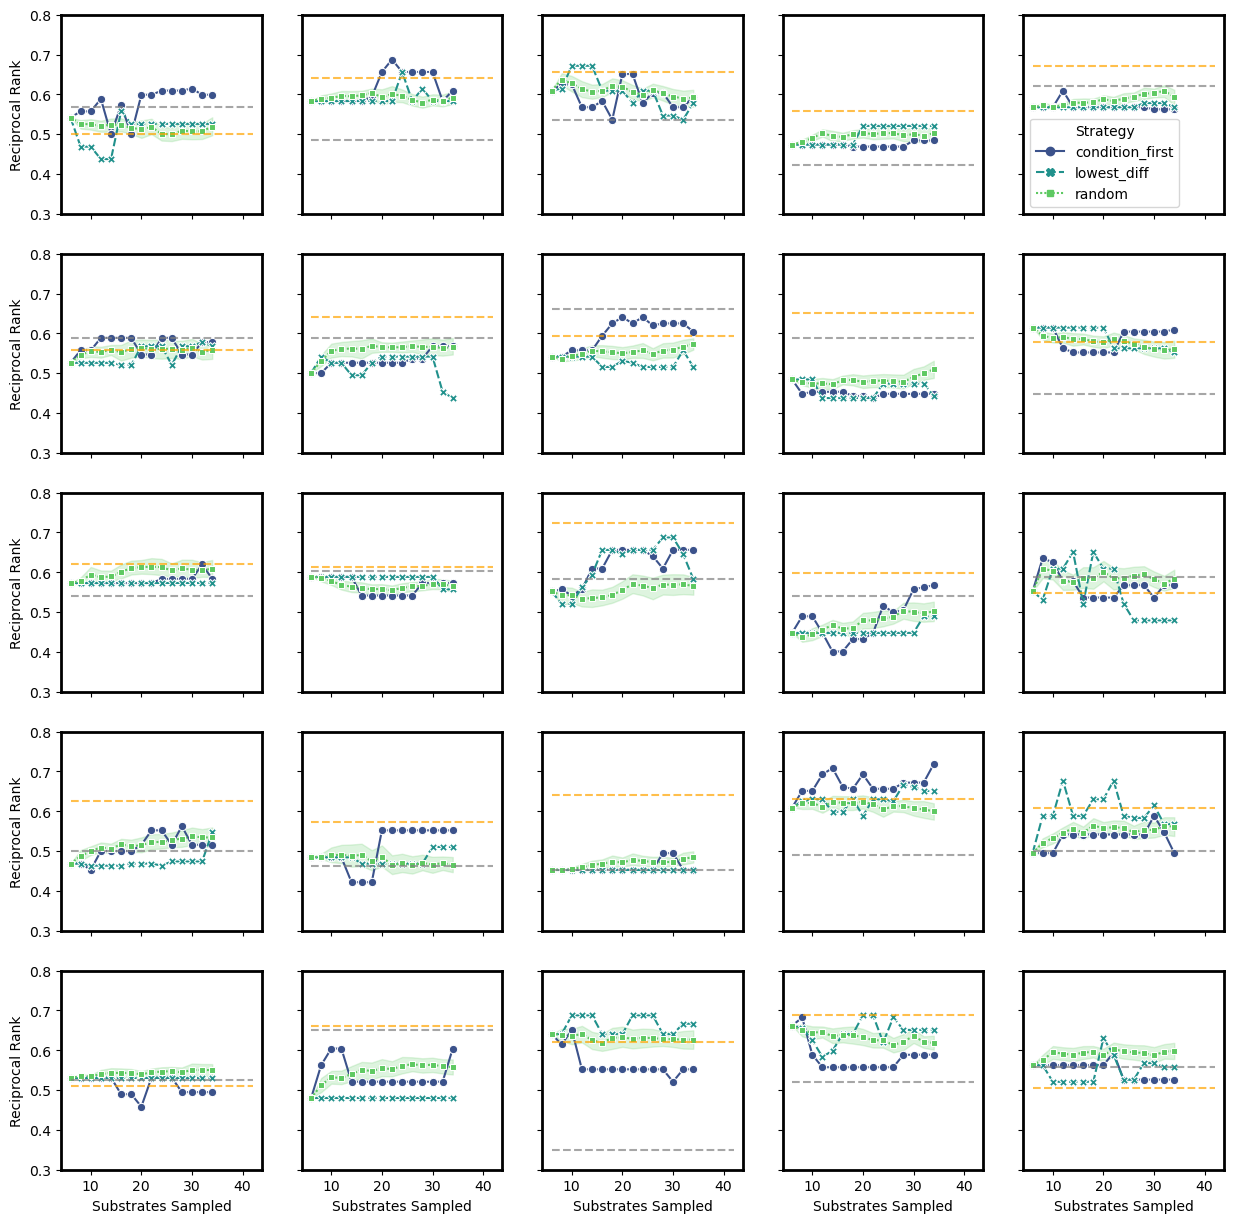

In [14]:
al_df = pd.concat(al_result_dfs, ignore_index=True)
strategy_col = []
for strategy, df in zip(al_sheet_names, al_result_dfs) :
    strategy_col.extend([strategy[:-8]]*df.shape[0])
al_df["Strategy"] = strategy_col

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(15,15)) #12,12
for i in range(25):
    row = i // 5
    col = i % 5
    sns.lineplot(al_df[al_df["Evaluation Iteration"]==i], x="Substrates Sampled", y="Reciprocal Rank", hue="Strategy", style="Strategy", markers=True, ax=ax[row,col], palette="viridis")
    rpc_df = full_data_dfs[0]
    ax[row, col].plot(np.arange(6,44,2), [rpc_df[rpc_df["Evaluation Iteration"]==i]["Reciprocal Rank"]]*19, color="orange", alpha=0.7, ls="--")
    rfr_df = full_data_dfs[1]
    ax[row, col].plot(np.arange(6,44,2), [rfr_df[rfr_df["Evaluation Iteration"]==i]["Reciprocal Rank"]]*19, color="grey", alpha=0.7, ls="--")
    if row == 0 and col == 4 :
        pass
    else :
        ax[row, col].get_legend().remove()
    ax[row, col].set_ylim(0.3, 0.8)
    ax[row, col].set_yticks([round(0.1*x, 1) for x in range(3,9) ])
    if row != 4 :
        ax[row, col].set_xlabel("")
    if col != 0 :
        ax[row, col].set_ylabel("")
    else :
        ax[row, col].set_yticks([round(0.1*x, 1) for x in range(3,9) ])
    
    for axis in ['top', 'bottom', 'left', 'right']:
        ax[row, col].spines[axis].set_linewidth(2)


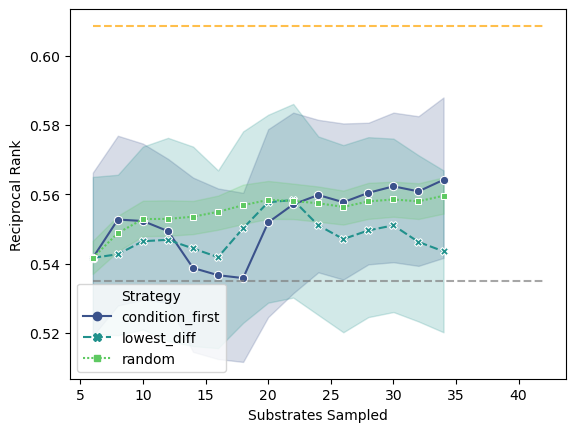

In [15]:
fig, ax = plt.subplots()
sns.lineplot(al_df, x="Substrates Sampled", y="Reciprocal Rank", hue="Strategy", style="Strategy", markers=True, palette="viridis")
ax.plot(np.arange(6,44,2), [rpc_df["Reciprocal Rank"].mean()]*19, color="orange", alpha=0.7, ls="--")
ax.plot(np.arange(6,44,2), [rfr_df["Reciprocal Rank"].mean()]*19, color="grey", alpha=0.7, ls="--")

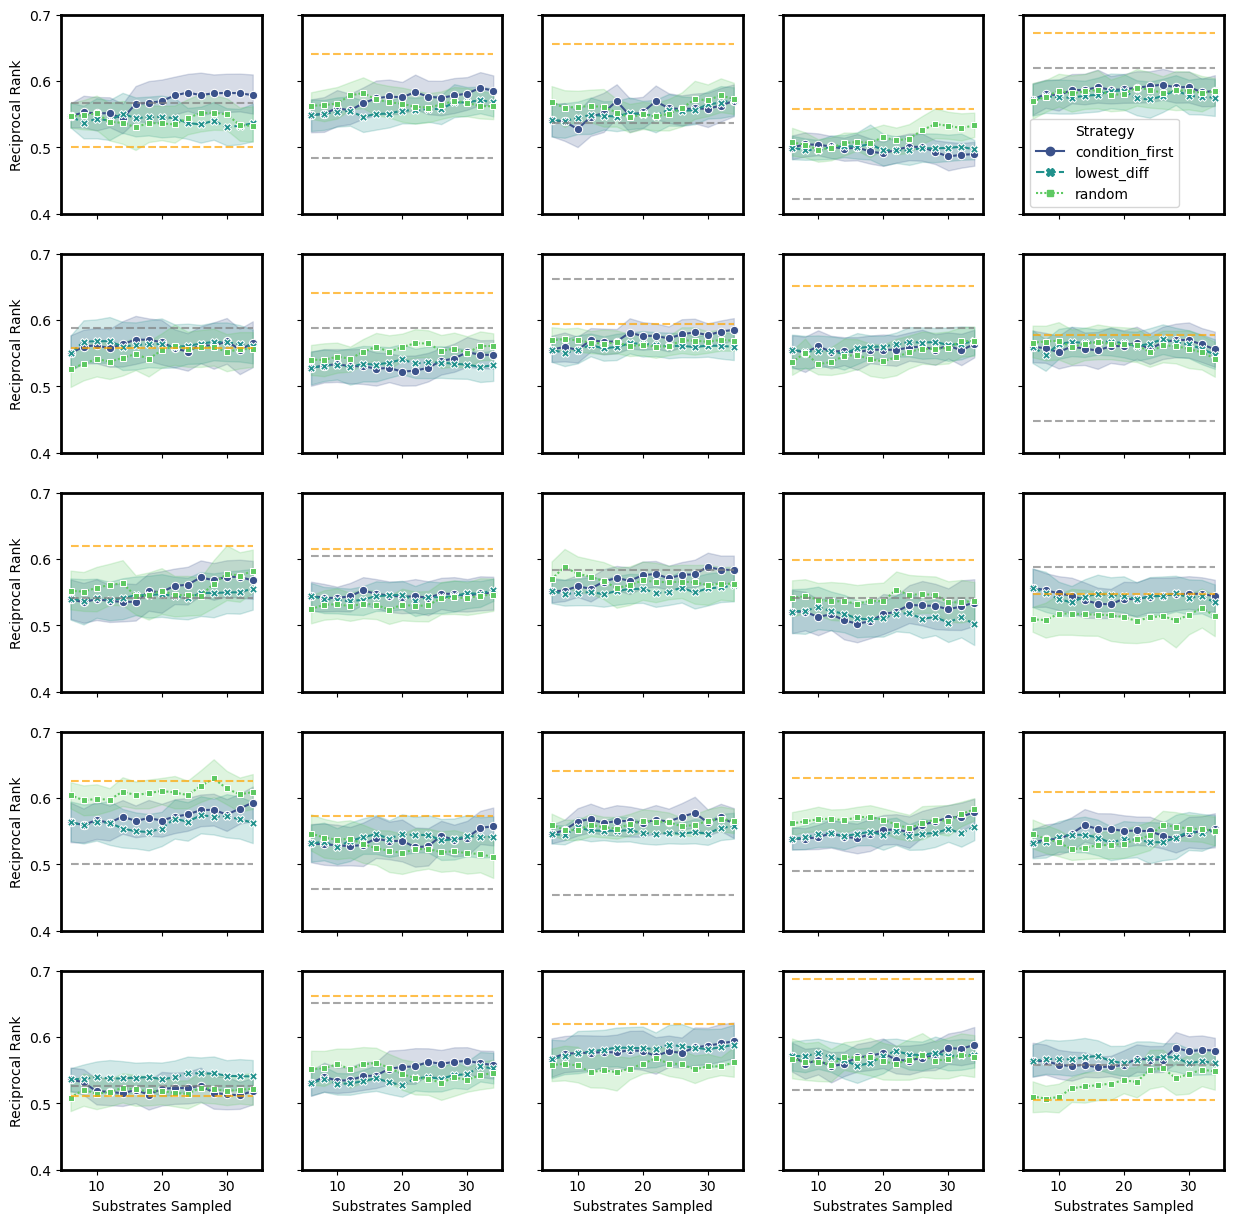

In [5]:
random_df = pd.concat(random_result_dfs, ignore_index=True)
strategy_col = []
for strategy, df in zip(random_sheet_names, random_result_dfs) :
    strategy_col.extend([strategy[:-7]]*df.shape[0])
random_df["Strategy"] = strategy_col

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(15,15)) #12,12
for i in range(25):
    row = i // 5
    col = i % 5
    sns.lineplot(random_df[random_df["Evaluation Iteration"]==i], x="Substrates Sampled", y="Reciprocal Rank", hue="Strategy", style="Strategy", markers=True, ax=ax[row,col], palette="viridis")
    rpc_df = full_data_dfs[0]
    ax[row, col].plot(np.arange(6,36,2), [rpc_df[rpc_df["Evaluation Iteration"]==i]["Reciprocal Rank"]]*15, color="orange", alpha=0.7, ls="--")
    rfr_df = full_data_dfs[1]
    ax[row, col].plot(np.arange(6,36,2), [rfr_df[rfr_df["Evaluation Iteration"]==i]["Reciprocal Rank"]]*15, color="grey", alpha=0.7, ls="--")
    if row == 0 and col == 4 :
        pass
    else :
        ax[row, col].get_legend().remove()
    ax[row, col].set_ylim(0.4, 0.7)
    ax[row, col].set_yticks([round(0.1*x, 1) for x in range(4,8) ])
    if row != 4 :
        ax[row, col].set_xlabel("")
    if col != 0 :
        ax[row, col].set_ylabel("")
    else :
        ax[row, col].set_yticks([round(0.1*x, 1) for x in range(4,8) ])
    
    for axis in ['top', 'bottom', 'left', 'right']:
        ax[row, col].spines[axis].set_linewidth(2)
